# 1.2.4 The Gaussian Distribution

In this notebook, we will fit a 1D Gaussian distribution to a toy dataset composed of n=7 samples, as shown in Figure 1.14.

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load data and calculate basic statistics

In [2]:
x = np.loadtxt('01_14.txt')

In [3]:
x

array([1.28, 1.71, 2.58, 3.85, 5.14, 6.84, 8.12])

In [4]:
N = len(x)
N

7

In [5]:
sample_mean = np.sum(x) / N
sample_mean

4.217142857142856

In [6]:
sample_var = np.sum((x - sample_mean) ** 2) / N
sample_var

5.8129918367346916

In [7]:
sample_std = np.sqrt(sample_var)
sample_std

2.4110146902776624

# Fit the data using a Gaussian distribution

In [8]:
mu = 4.2
sigma = 1.5

In [9]:
norm.logpdf(x, loc=mu, scale=sigma)  # log-likelihood for each data point

array([-3.2191592 , -2.70220364, -1.90760364, -1.35162586, -1.5207592 ,
       -2.87320364, -4.7391592 ])

In [10]:
np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # log-likelihood of the entire dataset

-18.313714378078746

In [11]:
def log_likelihood(mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))

In [12]:
log_likelihood(3., 1.0)

-31.9630697324327

In [13]:
x_grid = np.linspace(0, 10, 100)

In [14]:
p_grid = norm.pdf(x_grid, loc=mu, scale=sigma)

In [15]:
p = norm.pdf(x, loc=mu, scale=sigma) 

In [16]:
ll = log_likelihood(mu, sigma)

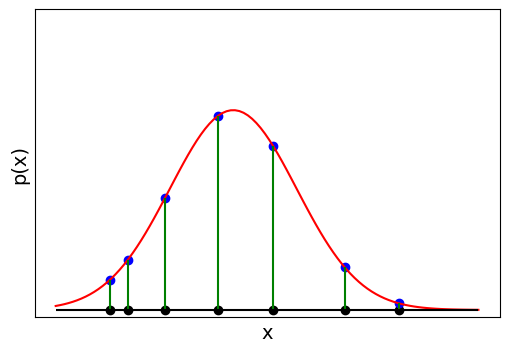

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(x, np.zeros_like(x), 'ko')
plt.plot(x, p, 'bo')
plt.plot(x_grid, p_grid, 'r')
for xx, pp in zip(x, p):
    plt.vlines(x=xx, ymin=0, ymax=pp, color='g')
plt.hlines(y=0, xmin=0, xmax=10, color='k')
plt.xlabel('x', fontsize=14)
plt.ylabel('p(x)', fontsize=14)
plt.ylim(-0.01, 0.4)
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
def plot_results(mu, sigma):
    ll = log_likelihood(mu, sigma)
    p = norm.pdf(x, loc=mu, scale=sigma) 
    x_grid = np.linspace(0, 10, 100)
    p_grid = norm.pdf(x_grid, loc=mu, scale=sigma)
    
    plt.plot(x, np.zeros_like(x), 'ko')
    plt.plot(x, p, 'bo')
    plt.plot(x_grid, p_grid, 'r')
    for xx, pp in zip(x, p):
        plt.vlines(x=xx, ymin=0, ymax=pp, color='g')
    plt.hlines(y=0, xmin=0, xmax=10, color='k')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('p(x)', fontsize=14)
    plt.title(f'Log likelihood: {ll:.4f}')
    plt.ylim(-0.02, 0.4)
    plt.show()

In [19]:
interact(
    plot_results,
    mu = (0, 10, 0.01),
    sigma = (0.5, 4.0, 0.01),
);

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0, step=0.01), FloatSlider(value=2.25, d…